# Study of GoFast scooter rental service

**Brief description:** There is data about some users from several cities, as well as about their trips.

To travel around the city, users of the GoFast service use a mobile application. The service can be used:
- no subscription
     - there is no subscription fee;
     - the cost of one minute of travel is 8 rubles;
     - cost of start (beginning of the trip) - 50 rubles;
- with Ultra subscription
     - subscription fee - 199 rubles per month;
     - the cost of one minute of travel is 6 rubles;
     - start-up cost is free.

**Project Goal:** To analyze data and test some hypotheses that can help the business grow.

**Description of data:**

*Users*
- ```user_id``` - unique user identifier
- ```name``` - user name
- ```age``` - age
- ```city``` - city
- ```subscription_type``` - subscription type (free, ultra)

*Trips*
- ```user_id``` - unique user identifier
- ```distance``` - the distance the user has traveled in the current session (in meters)
- ```duration``` - session duration (in minutes) - the time from the moment the user pressed the “Start trip” button until the moment he pressed the “End trip” button
- ```date``` - date of the trip

*Subscriptions*
- ```subscription_type``` - subscription type
- ```minute_price``` - the cost of one minute of travel for this subscription
- ```start_ride_price``` - cost of starting the trip
- ```subscription_fee``` - monthly payment cost

**Work plan**
1. Explore the data
2. Preprocess the data
3. Analyze the data
4. Merge data
5. Calculate revenue
6. Test hypotheses
7. Construct distributions
8. Draw up conclusions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from math import sqrt

## Step 1. Loading and studying data

In [2]:
users = pd.read_csv('.\\datasets\\users_go.csv')
rides = pd.read_csv('.\\datasets\\rides_go.csv')
subscriptions = pd.read_csv('.\\datasets\\subscriptions_go.csv')

### Users

In [3]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


### Rides

In [5]:
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [6]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


### Subscriptions

In [7]:
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


### Intermediate output

Data was obtained, stored in variables and examined.

According to the initial analysis of the data, there are no gaps in them; the data types of the columns, except for the late date, are suitable for the values stored in them.

## Step 2. Data preprocessing

### Data type casting

In [8]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')
rides['date'].head()

0   2021-01-01
1   2021-01-18
2   2021-04-20
3   2021-08-11
4   2021-08-28
Name: date, dtype: datetime64[ns]

The ```data``` column has been cast to datetime type.

### Create the required columns

In [9]:
rides['month'] = rides['date'].dt.month
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


A column ```month``` has been created containing the month of the trip.

### Search for duplicates

In [10]:
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [11]:
users.duplicated().sum()

31

In [12]:
f'Percentage of duplicates from all data: {(users.duplicated().sum() / users.shape[0]):.2%}'

'Percentage of duplicates from all data: 1.98%'

In [13]:
users = users.drop_duplicates().reset_index(drop=True)
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 60.0+ KB


In [14]:
rides.duplicated().sum()

0

Obvious duplicates were found in the users dataframe and removed.

## Step 3. Exploratory data analysis

<AxesSubplot:title={'center':'Frequency of occurrence of cities in the data'}, xlabel='Cities', ylabel='How many times does the city meet'>

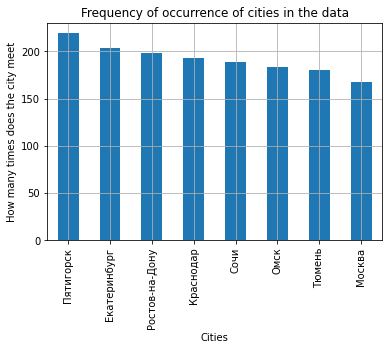

In [15]:
users['city'].value_counts().plot(kind='bar', grid=True,
                                  title='Frequency of occurrence of cities in the data',
                                  ylabel='How many times does the city meet',
                                  xlabel='Cities'
                                 )

In [16]:
users['city'].value_counts()

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

From the graph above you can see that the most registered users are in Pyatigorsk, and the least in Moscow, but the difference is not big, about 50 users.

In [17]:
users['subscription_type'].value_counts(normalize=True)

subscription_type
free     0.544329
ultra    0.455671
Name: proportion, dtype: float64

<AxesSubplot:title={'center':'How many users with and without subscription'}, ylabel='proportion'>

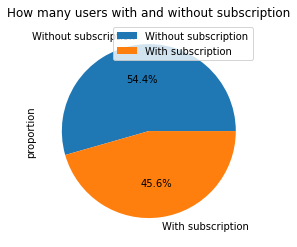

In [18]:
users['subscription_type'].value_counts(normalize=True).plot(kind='pie', legend=True,
                                                             title='How many users with and without subscription', autopct='%1.1f%%',
                                                             labels=['Without subscription', 'With subscription']
                                                            )

54% of users have a free subscription, the rest have a paid subscription.

<AxesSubplot:title={'center':'User age histogram'}, xlabel='Age', ylabel='Frequency'>

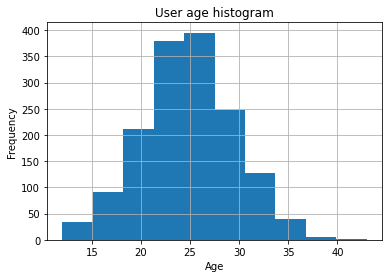

In [19]:
users['age'].plot(kind='hist', grid=True,
                  xlabel='Age', ylabel='Frequency',
                  title='User age histogram'
                 )

In [20]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

The data on the age of users is distributed normally, most of the users are 22-28 years old, then, as the age moves away from these values in both directions, the number of people with an age other than 22-28 years decreases.

The least number of users are over 38 years old.

<AxesSubplot:title={'center':'Histogram for distances traveled by users'}, xlabel='Meters', ylabel='Frequency'>

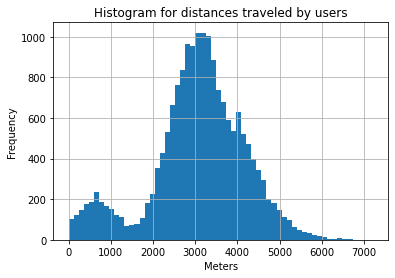

In [21]:
rides['distance'].plot(kind='hist', bins=60, grid=True,
                      ylabel='Frequency', xlabel='Meters',
                      title='Histogram for distances traveled by users')

Used on average, most often, travel about 3 km. on a scooter, there is also a small outlier-normal distribution, which shows that some users take a scooter to travel about 500 meters, probably when they need to ride not a long distance or just for a ride.

<AxesSubplot:title={'center':'Histogram for user travel duration'}, xlabel='Minutes', ylabel='Frequency'>

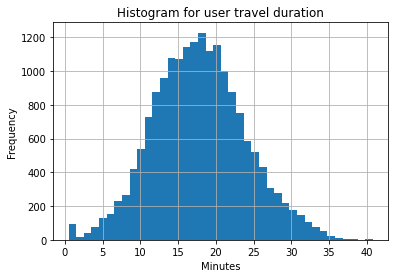

In [22]:
rides['duration'].plot(kind='hist', bins=40, grid=True,
                      ylabel='Frequency', xlabel='Minutes',
                      title='Histogram for user travel duration')

On average, users' trips last about 15-20 minutes. There is a slight deviation of about 1 minute of travel.

### Intermediate output

- the most users are from Pyatigorsk, the least from Moscow;
- 54% of users have a free subscription, the rest have a paid subscription;
- most of the users are 22-28 year olds;
- used on average travel about 3 km. on a scooter;
- on average, users' trips last about 15-20 minutes.

## Step 4. Merging data

In [23]:
data = users.merge(rides, on='user_id')
data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8


Combine the users and rides dataframes into a dataframe.

In [24]:
data = data.merge(subscriptions, on='subscription_type')
data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


We combine dataframe data and subscription into dataframe data.

In [25]:
users_without_subscription = data[data['subscription_type'] == 'free']
users_without_subscription.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


In [26]:
users_with_subscription = data[data['subscription_type'] == 'ultra']
users_with_subscription.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [27]:
data.shape, users_without_subscription.shape, users_with_subscription.shape

((18068, 12), (11568, 12), (6500, 12))

We also created 2 new datasets, which include data about users without a subscription and with a subscription.

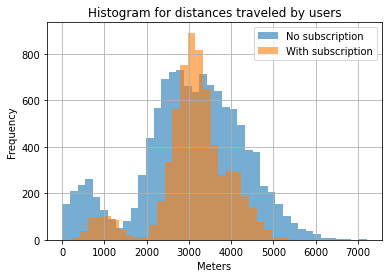

In [28]:
users_without_subscription['distance'].plot(kind='hist', bins=40, grid=True, alpha=0.6,
                                            legend=True, label='No subscription'
                                           )
users_with_subscription['distance'].plot(kind='hist', bins=30, grid=True, alpha=0.6,
                                         legend=True, label='With subscription',
                                         xlabel='Meters', ylabel='Frequency',
                                         title='Histogram for distances traveled by users'
                                        )
plt.show()

You can see that the graph for users with a subscription has less spread in the data compared to the graph for users without a subscription. Perhaps users with a subscription most often travel to their specific points, for example, always to work or school.

There are 2 peaks on the graph for users without a subscription, which means that most often users without a subscription ride about 3 km, and a little less often users take a scooter to ride about 500 meters.

There are also 2 peaks on the graph for users with a subscription, which means that most often users with a subscription also ride about 3 km, and a little less often users take a scooter to ride about 1 km.

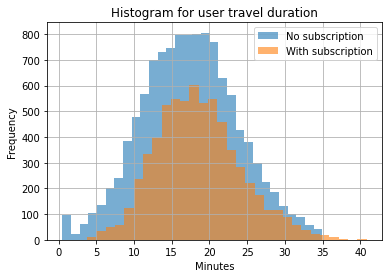

In [29]:
users_without_subscription['duration'].plot(kind='hist', bins=30, grid=True, alpha=0.6,
                                            legend=True, label='No subscription'
                                           )
users_with_subscription['duration'].plot(kind='hist', bins=30, grid=True, alpha=0.6,
                                         legend=True, label='With subscription',
                                         xlabel='Minutes', ylabel='Frequency',
                                         title='Histogram for user travel duration'
                                        )
plt.show()

The average trip for users without a subscription lasts about 15-20 minutes.

The trip for users with a subscription also lasts about 15-20 minutes.

The graph of users without a subscription has a greater spread in data than that of users with a subscription.

### Intermediate output

Users without and with a subscription have similar behavior when renting scooters, but users with a subscription are more likely to rent scooters for specific periods of time, perhaps for work or school.

## Step 5. Calculating revenue

In [30]:
data['spent_money_for_rides'] = data['start_ride_price'] + np.ceil(data['duration']) * data['minute_price']
data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee,spent_money_for_rides
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199,156.0
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199,96.0
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199,42.0
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199,114.0
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199,162.0


In [31]:
data_about_rides_and_money = data.pivot_table(
    index=['user_id', 'month'], values=['distance', 'duration', 'spent_money_for_rides'],
    aggfunc={'distance': 'sum', 'duration': 'sum', 'spent_money_for_rides': 'sum', 'user_id': 'count'}
)
data_about_rides_and_money.columns = ['sum_distance', 'sum_duration', 'sum_spent_money_for_rides', 'count_rides']
# We add a subscription fee to each user if he is subscribed
data_about_rides_and_money['sum_spent_money_for_rides'] += data.groupby(['user_id', 'month'])['subscription_fee'].sum() / data_about_rides_and_money['count_rides']
data_about_rides_and_money.reset_index(inplace=True)
data_about_rides_and_money.head()

,user_id,month,sum_distance,sum_duration,sum_spent_money_for_rides,count_rides
0,1,1,7027.511294,41.416640,451.0,2
1,1,4,754.159807,6.232113,241.0,1
2,1,8,6723.470560,44.776802,475.0,2
3,1,10,5809.911100,31.578017,391.0,2
4,1,11,7003.499363,53.397424,535.0,3


A dataframe was created with aggregated trip data, including: total distance, number of trips, monthly revenue generated by each user, and total time for each user for each month.

## Step 6. Testing hypotheses

### Hypothesis testing 1. Do users with a subscription spend more time traveling?

**Null hypothesis:** the average trip durations for users with and without a subscription are equal.

**Alternative Hypothesis:** The average trip duration for users with a subscription is longer than the average trip duration for users without a subscription.

I set the ```equal_var``` parameter for the test to False, since the graph shows that the scatter of the graphs is different.
(even if set to True, the test will reject the null hypothesis)

In [32]:
alpha = 0.05

results = st.ttest_ind(users_with_subscription['duration'], users_without_subscription['duration'], equal_var=False, alternative='greater')

print('Pvalue: ', results.pvalue)

if results.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('There is no reason to reject the null hypothesis')

Pvalue:  5.675781377128977e-37
Rejecting the null hypothesis


There is evidence to say that users with a subscription spend more time traveling compared to users without a subscription!

### Testing hypothesis 2. Do users with a subscription travel more than 3130 meters in one trip?

**Null hypothesis:** the average distance traveled by users with a subscription in one trip is 3130 meters.

**Alternative hypothesis:** the average distance traveled by users with a subscription per trip exceeds 3130 meters.

In [33]:
alpha = 0.05

optimal_distance = 3130

results = st.ttest_1samp(users_with_subscription['distance'], optimal_distance, alternative='greater')

print('Pvalue: ', results.pvalue)

if results.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('There is no reason to reject the null hypothesis')

Pvalue:  0.9195368847849785
There is no reason to reject the null hypothesis


There is reason to say that users with a subscription travel an average of 3,130 meters per trip.

There is no reason to believe that users with a subscription travel more than 3130 meters in one trip.

### Hypothesis Test 3: Will the monthly revenue from users with a monthly subscription be higher than the revenue from users without a subscription?

In [34]:
data_about_rides_and_money = data_about_rides_and_money.merge(data[['user_id', 'month', 'subscription_type']], on=['user_id', 'month'])
data_about_rides_and_money.head()

,user_id,month,sum_distance,sum_duration,sum_spent_money_for_rides,count_rides,subscription_type
0,1,1,7027.511294,41.416640,451.0,2,ultra
1,1,1,7027.511294,41.416640,451.0,2,ultra
2,1,4,754.159807,6.232113,241.0,1,ultra
3,1,8,6723.470560,44.776802,475.0,2,ultra
4,1,8,6723.470560,44.776802,475.0,2,ultra


Let's add a column with data on the type of subscription for each user to the revenue table.

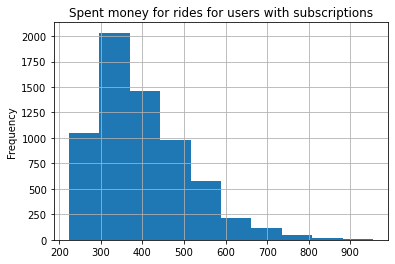

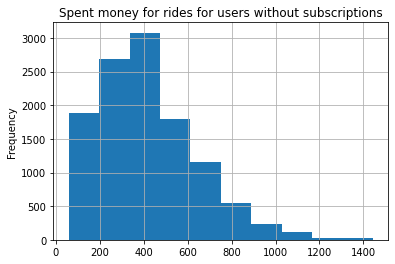

In [35]:
data_about_rides_and_money.query('subscription_type == "ultra"')['sum_spent_money_for_rides'].plot(
    kind='hist', grid=True, title='Spent money for rides for users with subscriptions'
)
plt.show()
data_about_rides_and_money.query('subscription_type == "free"')['sum_spent_money_for_rides'].plot(
    kind='hist', grid=True, title='Spent money for rides for users without subscriptions'
)
plt.show()

From the graphs you can see that the spread of data does not vary much.

You can also preliminary note that users without a subscription spend on average more money on trips.

**Null Hypothesis:** Average monthly revenues for both subscribed and non-subscribed users are the same.

**Alternate Hypothesis:** The average monthly revenue for users with a subscription is greater than the average monthly revenue for users without a subscription.

In [36]:
alpha = 0.05

for month in range(1, 13):
    results = st.ttest_ind(
        data_about_rides_and_money.query('month == @month and subscription_type == "ultra"')['sum_spent_money_for_rides'],
        data_about_rides_and_money.query('month == @month and subscription_type == "free"')['sum_spent_money_for_rides'],
        alternative='greater'
    )

    print('Pvalue: ', results.pvalue)

    if results.pvalue < alpha:
        print('There is no reason to reject the null hypothesis for month', month)
    else:
        print('', month)

Pvalue:  0.6841297292269042
 1
Pvalue:  0.9949238774849607
 2
Pvalue:  0.9888626135320185
 3
Pvalue:  0.9898413899892002
 4
Pvalue:  0.8389200273376516
 5
Pvalue:  0.9740653370860037
 6
Pvalue:  0.9187638435541551
 7
Pvalue:  0.9993513108137787
 8
Pvalue:  0.9681411273121675
 9
Pvalue:  0.8127165153538547
 10
Pvalue:  0.9391101416602814
 11
Pvalue:  0.9819746396622085
 12


There is evidence to say that users with a subscription generate as much revenue each month as users without a subscription.

There is no evidence to suggest that users with a subscription generate more monthly revenue than users without a subscription.

### Answer to the question.

**Conditions:** the technical team of the service has updated the servers with which the mobile application interacts. She hopes that because of this, the number of calls to technical support has decreased significantly. A certain file contains data for each user on the number of hits before and after the update.

**Question:** What test would you need to test this hypothesis?

For a given task and available data, you can use a test to test the hypothesis about the equality of the mean value for dependent samples.

```st.ttest_rel(before, after)```

## Step 7. Distributions

### Task 1. Promotion with distribution of promotional codes

The GoFast marketing department was given a **task**: they needed to run a promotion with the distribution of promotional codes for one free month of subscription, within which at least 100 existing customers must renew this subscription. That is, at the end of the subscription period, the user can either cancel it or renew it by making the appropriate payment.

This promotion has already been carried out previously and as a result it turned out that after the free trial period, 10% of users renew their subscription.

**Question:** What is the minimum number of promotional codes that must be sent out so that the probability of not fulfilling the plan is approximately 5%?

In [37]:
p = 0.1
k = 100

distr = []
for n in range(k, 1500+1):
    current_value = st.binom.cdf(k-1, n, p)
    distr.append(1 - current_value)

In the code above, a binomial distribution was constructed and its cumulative function was calculated for different values of *N*, *k = 100* since we need to find that from 100 clients, including 100, will renew their subscription, the probability of the event occurring = 0.1 or 10%.

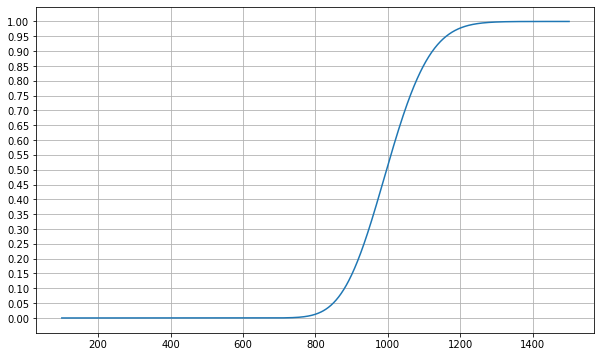

In [38]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
ax.set_yticks(np.arange(0, 1.1, 0.05))
plt.plot(range(k, 1500+1), distr)
plt.grid()
plt.show()

We need to find the minimum number of promotional codes that need to be sent out so that the probability of not fulfilling the plan is approximately 5% or so that the probability of fulfilling the plan is approximately 95%.

The graph shows that for a probability of 95% we need to send out **from 1180 promotional codes.**

### Task 2. Push notifications in the mobile application.

The marketing department sends push notifications to customers in the mobile application. Clients may or may not open it. It is known that notifications are opened by about 40% of customers who receive them. The department plans to send out 1 million notices.

**Task:** estimate the probability that the notification will be opened by no more than 399.5 thousand users.

Since our p (probability) is not close to 1 or 0, and n is relatively large, we can use the approximation of the binomial distribution to the normal distribution to calculate the probability.

In [39]:
n = 1000000
p = 0.4

mu = n*p 
sigma = sqrt(n*p*(1-p))

distr = st.norm(mu, sigma) 

result = distr.cdf(399500)
result

0.15371708296369768

Based on the above calculations, you can see that the probability that the notification will be opened by less than 399.5 thousand users **is approximately 15%.**

## General conclusion

*Data about some users from several cities, as well as about their trips* was received from the customer.

The data was of fairly good quality, so the following steps were done at the preprocessing stage:
- converted 1 column to datetime type,
- added a new column for calculations (month of trip),
- duplicates were removed in the table with users (approximately 2% of all data).

Next, **exploratory data analysis** was carried out, during which **it was found out:**
- the most users are from Pyatigorsk, and the least from Moscow, but the difference is not big, about 50 users;
- 54% of users have a free subscription, the rest have a paid subscription;
- most of the users are 22-28 year olds;
- used on average travel about 3 km. on a scooter;
- on average, users' trips last about 15-20 minutes.

Next was the stage of combining data and considering users with and without subscription separately.

**Conclusion:** users without and with a subscription have similar behavior when renting scooters, but users with a subscription are more likely to rent scooters for specific periods of time, perhaps for work or school.

At the next stage, a table was created based on the available data with monthly revenue for each client. And based on these data, statistical analysis was carried out.

During the **statistical analysis** hypotheses were tested and **based on the results we can say that**:
- users with a subscription spend more time traveling compared to users without a subscription;
- there is no reason to believe that users with a subscription travel more than 3130 meters in one trip;
- there is no reason to say that users with a subscription bring in more monthly revenue than users without a subscription.

Additionally, calculations were carried out using distributions, from which the following can be said:
- 1180 promotional codes need to be sent out so that the probability of not fulfilling the plan for the promotion with the distribution of promotional codes for one free month of subscription is approximately 5%;
- when sending push notifications to 1 million customers in a mobile application, the probability that the notification will be opened by no more than 399.5 thousand users is approximately 15%.